In [39]:
import zipfile
import pandas as pd
from io import BytesIO

In [37]:
# Path to the uploaded ZIP file
zip_path = r"C:\Users\suvee\Documents\Intellipat\Python Assignments\Projects\Analyzing Naming Trends_Project\names.zip"

# Inspect the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    file_list = z.namelist()

file_list

['yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 'yob1941.txt',
 'yob194

In [41]:
first_10_years_df = pd.DataFrame()

In [43]:
last_10_years_df = pd.DataFrame()

In [45]:
with zipfile.ZipFile(zip_path, 'r') as z:
    for file_name in file_list[:10]:
        year = int(file_name[3:7])
        # Read each file into a dataframe
        df = pd.read_csv(BytesIO(z.read(file_name)), header=None, names=['Name', 'Gender', 'Count'])
        df['Year'] = year  # Add year column
        first_10_years_df = pd.concat([first_10_years_df, df])

In [47]:
with zipfile.ZipFile(zip_path, 'r') as z:
    for file_name in file_list[-11:-1]:  # Exclude README
        year = int(file_name[3:7])
        # Read each file into a dataframe
        df = pd.read_csv(BytesIO(z.read(file_name)), header=None, names=['Name', 'Gender', 'Count'])
        df['Year'] = year  # Add year column
        last_10_years_df = pd.concat([last_10_years_df, df])

In [49]:
first_10_years_df.head()

,Name,Gender,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [51]:
last_10_years_df.head()

,Name,Gender,Count,Year
0,Emma,F,20961,2014
1,Olivia,F,19833,2014
2,Sophia,F,18640,2014
3,Isabella,F,17127,2014
4,Ava,F,15722,2014


In [53]:
import matplotlib.pyplot as plt

In [55]:
def plot_gender_distribution(df, year):
    data_year = df[df['Year'] == year]
    gender_counts = data_year.groupby('Gender')['Count'].sum()
    gender_counts.plot(kind='bar', title=f'Gender Distribution in {year}')
    plt.ylabel('Number of Births')
    plt.xlabel('Gender')
    plt.show()

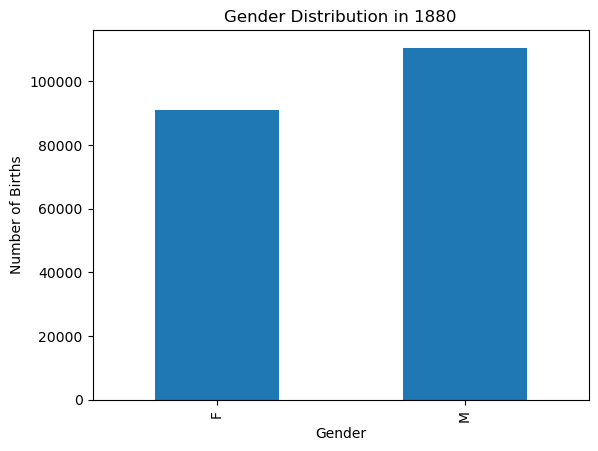

In [57]:
plot_gender_distribution(first_10_years_df, 1880)

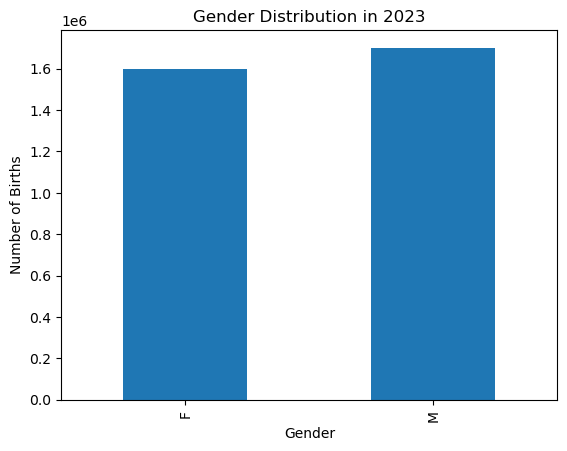

In [59]:
plot_gender_distribution(last_10_years_df, 2023)

In [61]:
def analyze_top_names(df, top_n=100):
    top_names = df.groupby('Name')['Count'].sum().sort_values(ascending=False).head(top_n)
    print("Top Names by Total Birth Count:")
    print(top_names)
    return top_names

# Example: Top 100 names in first 10 years and last 10 years
top_100_first_10 = analyze_top_names(first_10_years_df, top_n=100)
top_100_last_10 = analyze_top_names(last_10_years_df, top_n=100)

Top Names by Total Birth Count:
Name
Mary        92030
John        90394
William     85246
James       54323
George      47980
            ...  
Benjamin     5407
Nettie       5318
Ruth         5308
Alma         5287
Carl         5261
Name: Count, Length: 100, dtype: int64
Top Names by Total Birth Count:
Name
Liam      196436
Noah      191870
Olivia    181866
Emma      176254
Sophia    145089
           ...  
Zoey       57771
Jordan     57750
Nora       57509
Hannah     54473
Elias      54464
Name: Count, Length: 100, dtype: int64


In [63]:
def plot_top_names(df, top_n=100):
    top_names = df.groupby(['Name', 'Gender'])['Count'].sum().reset_index()
    top_names_sorted = top_names.sort_values(by='Count', ascending=False).head(top_n)
    top_names_sorted.pivot(index='Name', columns='Gender', values='Count').plot(kind='bar', stacked=True, figsize=(15, 7))
    plt.title(f'Top {top_n} Names by Gender')
    plt.ylabel('Total Count')
    plt.xlabel('Name')
    plt.show()

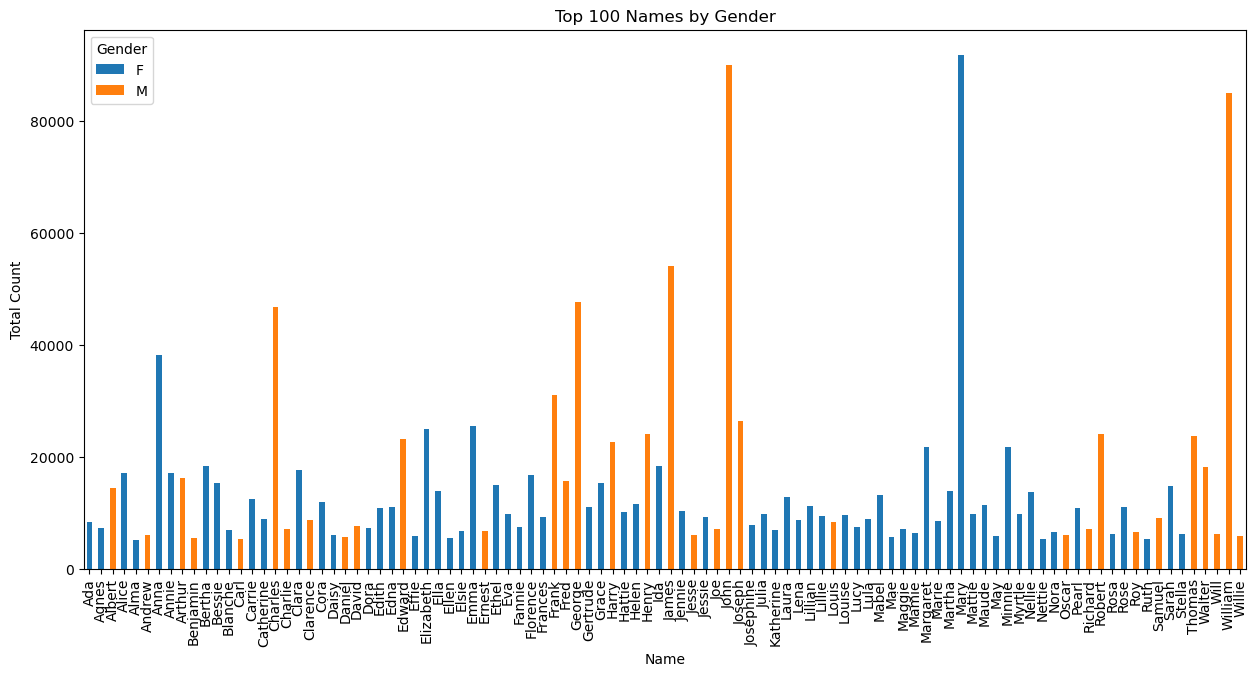

In [65]:
plot_top_names(first_10_years_df, top_n=100)

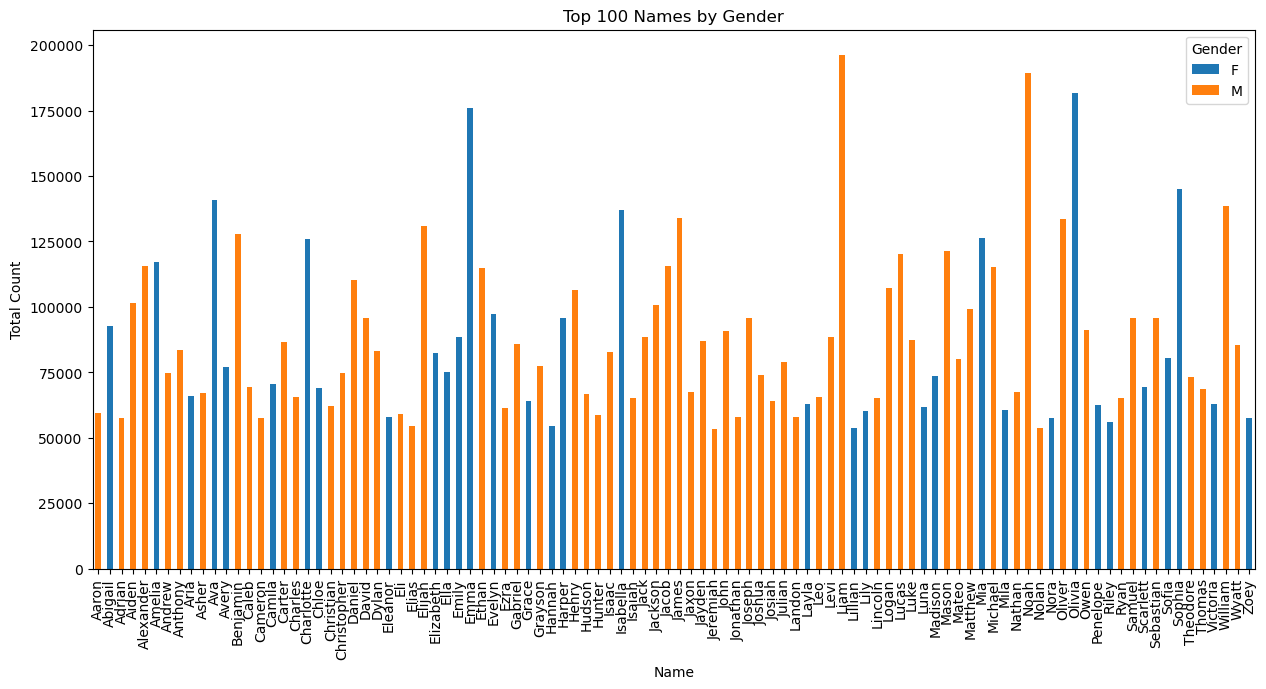

In [67]:
plot_top_names(last_10_years_df, top_n=100)